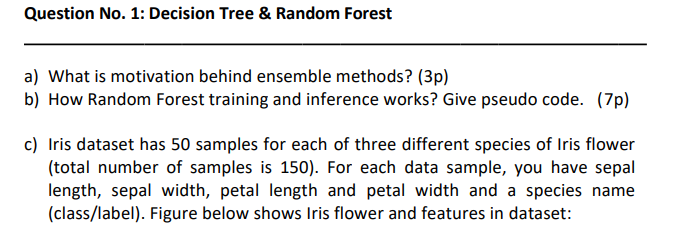

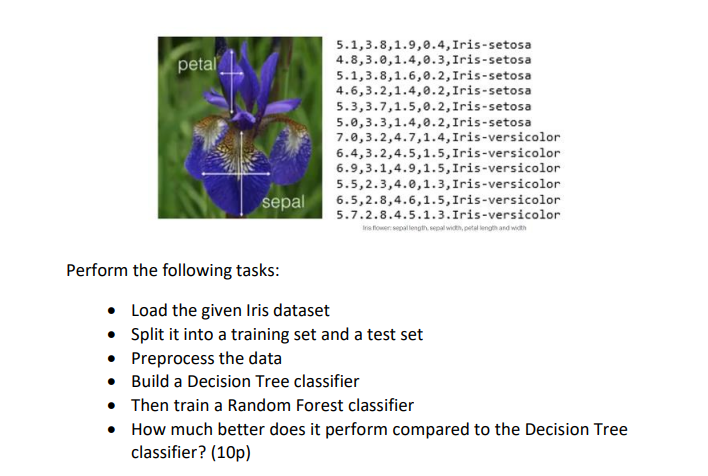

**PART A**

**a) Motivation behind ensemble**

**Ensemble methods** are a type of machine learning technique that involves combining multiple models to improve the accuracy and robustness of a single model. The motivation behind ensemble methods is that no single model is perfect, and there is always some degree of error or bias in any model. By combining multiple models, the errors and biases of individual models can be reduced, resulting in a more accurate prediction overall.

Another motivation behind ensemble methods is that they can be used to improve the performance of machine learning models on complex datasets. By combining multiple models with different strengths and weaknesses, ensemble methods can be designed to capture more of the complexity of the data and make more accurate predictions.

Ensemble methods are used in a wide variety of machine learning applications, including classification, regression, and anomaly detection. Some popular ensemble methods include bagging, boosting, and stacking.

# **PART B**

b) How Random Forest training and inference works? Give pseudo code.

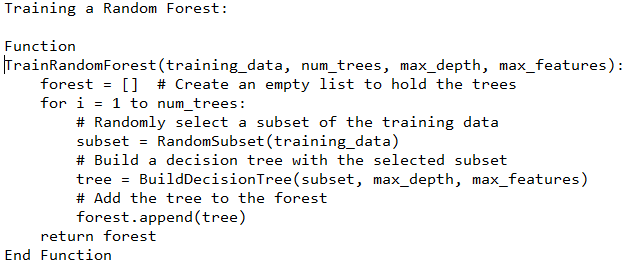

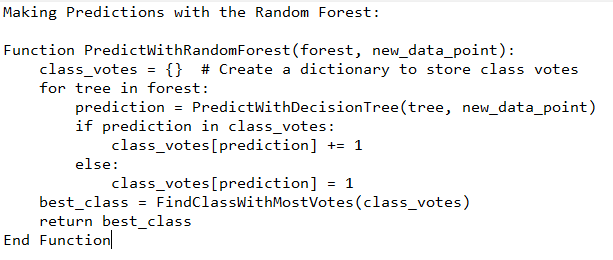

# **PART C**

# **Load the given Iris dataset**

In [30]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
df = pd.read_csv("Iris.csv")

In [32]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [34]:
output = df["Species"].values

In [35]:
output

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [36]:
type(output)

numpy.ndarray

In [37]:
# Create a mapping for the replacement
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Use the 'replace' function to create the new column
df['Encoded_Species'] = df['Species'].replace(mapping)


In [38]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [39]:
# Remove the 'Species' column
df = df.drop('Species', axis=1)
df = df.drop('Id', axis=1)


In [40]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
Target = df["Encoded_Species"].values

In [42]:
Target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
df = df.sample(frac=1, random_state=42) # Shuffle the DataFrame

In [44]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_Species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1
106,4.9,2.5,4.5,1.7,2
14,5.8,4.0,1.2,0.2,0
92,5.8,2.6,4.0,1.2,1


# Split it into a training set and a test set

In [45]:
# Split the data into feature (X) and target (Target)
feature = df.drop('Encoded_Species', axis=1)
Target = df['Encoded_Species']

In [46]:
# Define the split ratio
train_ratio = 0.8  # 80% for training, 20% for testing
test_ratio = 0.2

# Calculate the number of rows for training and testing
total_rows = len(df)
train_rows = int(train_ratio * total_rows)
test_rows = total_rows - train_rows

# Split the DataFrame into training and test DataFrames
train_df = df.iloc[:train_rows, :]
test_df = df.iloc[train_rows:, :]

# Reset the index for the new DataFrames
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Define features (X) and target (y) for training and test sets
X_train = train_df.drop('Encoded_Species', axis=1)
y_train = train_df['Encoded_Species']
X_test = test_df.drop('Encoded_Species', axis=1)
y_test = test_df['Encoded_Species']

In [47]:
train_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_Species
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
115,6.9,3.1,5.4,2.1,2
116,5.9,3.0,4.2,1.5,1
117,6.5,3.0,5.2,2.0,2
118,5.7,2.6,3.5,1.0,1


In [48]:
test_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_Species
0,6.1,3.0,4.6,1.4,1
1,4.5,2.3,1.3,0.3,0
2,6.6,2.9,4.6,1.3,1
3,5.5,2.6,4.4,1.2,1
4,5.3,3.7,1.5,0.2,0
5,5.6,3.0,4.1,1.3,1
6,7.3,2.9,6.3,1.8,2
7,6.7,3.3,5.7,2.1,2
8,5.1,3.7,1.5,0.4,0
9,4.9,2.4,3.3,1.0,1


# Preprocess the data

In [49]:
# Calculate the mean and standard deviation of each feature in the training set
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Perform feature scaling by subtracting the mean and dividing by the standard deviation
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

In [50]:
X_train_scaled.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.358536,-0.621797,0.579953,0.036562
1,-0.124883,1.646156,-1.107866,-1.124820
2,2.292213,-1.075388,1.817687,1.456028
3,0.237681,-0.395002,0.467432,0.423689
4,1.204520,-0.621797,0.636214,0.294647


In [51]:
X_test_scaled.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.358536,-0.168207,0.523693,0.294647
1,-1.575141,-1.755774,-1.332908,-1.124820
2,0.962810,-0.395002,0.523693,0.165604
3,-0.366593,-1.075388,0.411171,0.036562
4,-0.608303,1.419361,-1.220387,-1.253862


# **Build a Decision Tree classifier**

In [52]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5)  # You can set the maximum depth as desired

# Fit the classifier on the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy :.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 0.93
Accuracy: 93.33%


# **Then train a Random Forest classifier **



In [53]:
# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)  # You can adjust the number of trees (n_estimators)

# Fit the Random Forest classifier on the training data
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
rf_y_pred = rf_clf.predict(X_test_scaled)

# Calculate the accuracy of the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy :.2f}")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 0.97
Random Forest Accuracy: 96.67%


# **How much better does it perform compared to the Decision Tree classifier?**


In [54]:
# Accuracy of the Decision Tree classifier
decision_tree_accuracy = accuracy

# Accuracy of the Random Forest classifier
random_forest_accuracy = rf_accuracy

# Calculate the performance improvement
performance_improvement = (random_forest_accuracy - decision_tree_accuracy) * 100

print(f"Decision Tree Accuracy: {decision_tree_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {random_forest_accuracy * 100:.2f}%")
print(f"Performance Improvement: {performance_improvement:.2f}%")


Decision Tree Accuracy: 93.33%
Random Forest Accuracy: 96.67%
Performance Improvement: 3.33%
